<a href="https://colab.research.google.com/github/mirsadra/DPP-4/blob/main/t002_dpp4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install rdkit

In [6]:
import math

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.patches as mpatches
from rdkit import Chem, DataStructs
from rdkit.Chem import (
    PandasTools,
    Draw,
    Descriptors,
    MACCSkeys,
    rdFingerprintGenerator,
)

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
!ls "/content/drive/My Drive/Colab Notebooks/dpp4"

known_hits.csv	   output_data.csv  t002_molecules.csv
known_hits.gsheet  t002_dpp4	    t004_ligand_based_screen.ipynb


In [9]:
file_path = '/content/drive/My Drive/Colab Notebooks/dpp4/known_hits.csv'

In [10]:
molecules = pd.read_csv(file_path)

In [11]:
PandasTools.AddMoleculeColumnToFrame(molecules, "smiles")

,id,smiles,name,ROMol
0,1,NCC(NC1=C(F)C=C(C2=CC(OC)=CC=C2OC)C=C1)=O,54-J09,
1,2,NCC(NC1=C(F)C=C(C2=CN=C(OC)C=C2)C=C1)=O,114-F05,
2,3,NCC(NC1=C(F)C=C(C2=CC=C(OC)C(Cl)=C2)C=C1)=O,114-L05,
3,4,NCC(NC1=C(F)C=C(C2=CC=CC(NC(C)=O)=C2)C=C1)=O,114-B05,
4,5,C1CN2C(=NN=C2C(F)(F)F)CN1C(=O)CC(CC3=CC(=C(C=C...,Sitagliptin,
5,6,C1C2CC2N(C1C#N)C(=O)C(C34CC5CC(C3)CC(C5)(C4)O)N,Saxagliptin,
6,7,CC#CCN1C2=C(N=C1N3CCCC(C3)N)N(C(=O)N(C2=O)CC4=...,Linagliptin,
7,8,CN1CCC2=CC(=C(C=C2C1CC3=CC=C(C=C3)OC4=C(C=CC(=...,Daurisoline,
8,9,C1CC(CN(C1=O)CC(CC(=O)N2CCC3=C(C2)N=C(N=C3C(F)...,Gemigliptin,
9,10,B(C1CCCN1C(=O)CNC2CCNC2)(O)O,Dutogliptin,

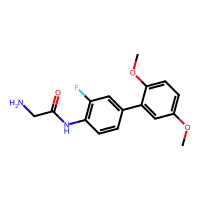
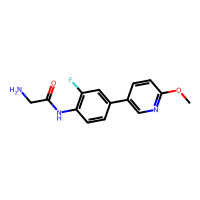
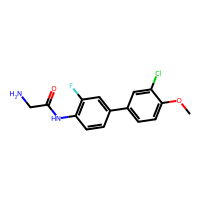
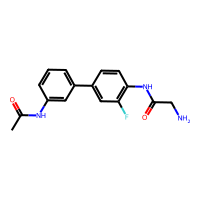
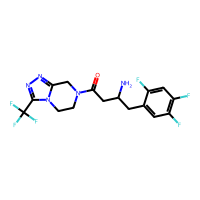
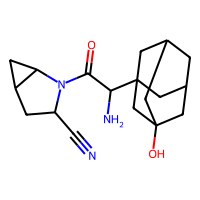
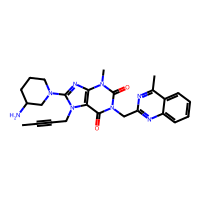
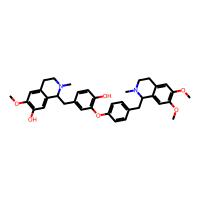
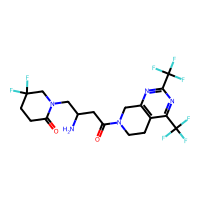
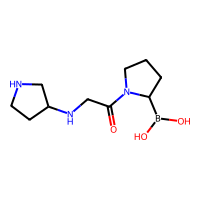
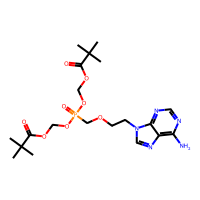
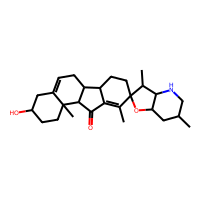
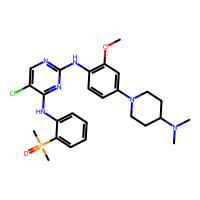
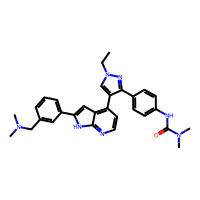
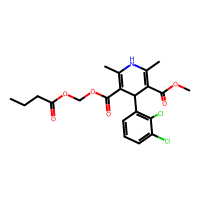

In [12]:
molecules

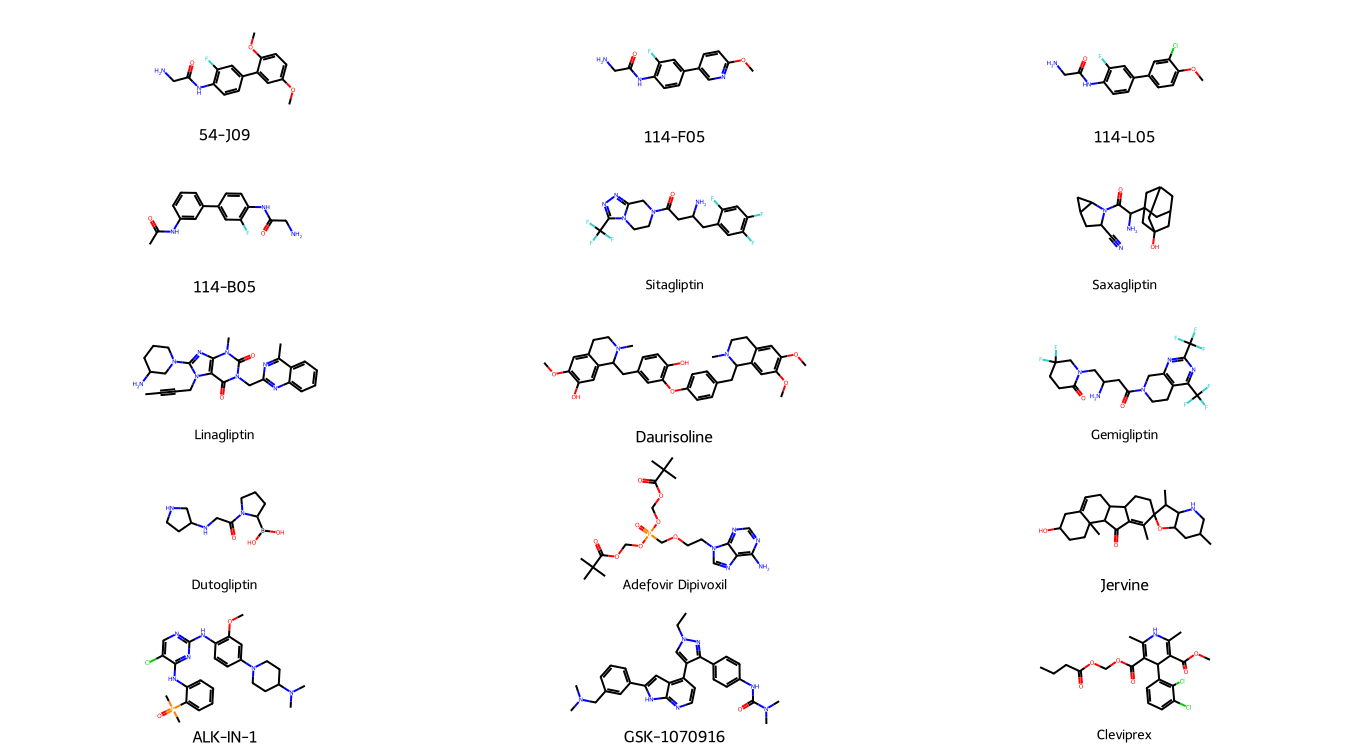

In [13]:
Draw.MolsToGridImage(
    molecules["ROMol"].to_list(),
    molsPerRow=3,
    subImgSize=(450, 150),
    legends=molecules["name"].to_list(),
)

In [14]:
# to all ROMol objects in the DataFrame
molecules["molecule_weight"] = molecules.ROMol.apply(Descriptors.MolWt)
# Sort molecules by molecular weight
molecules.sort_values(["molecule_weight"], ascending=False, inplace=True)

,id,smiles,name,ROMol,molecule_weight
7,8,CN1CCC2=CC(=C(C=C2C1CC3=CC=C(C=C3)OC4=C(C=CC(=...,Daurisoline,,610.751
12,13,CN(C)C1CCN(CC1)C2=CC(=C(C=C2)NC3=NC=C(C(=N3)NC...,ALK-IN-1,,529.025
13,14,CCN1C=C(C(=N1)C2=CC=C(C=C2)NC(=O)N(C)C)C3=C4C=...,GSK-1070916,,507.642
10,11,CC(C)(C)C(=O)OCOP(=O)(COCCN1C=NC2=C(N=CN=C21)N...,Adefovir Dipivoxil,,501.477
8,9,C1CC(CN(C1=O)CC(CC(=O)N2CCC3=C(C2)N=C(N=C3C(F)...,Gemigliptin,,489.367
6,7,CC#CCN1C2=C(N=C1N3CCCC(C3)N)N(C(=O)N(C2=O)CC4=...,Linagliptin,,472.553
14,15,CCCC(=O)OCOC(=O)C1=C(NC(=C(C1C2=C(C(=CC=C2)Cl)...,Cleviprex,,456.322
11,12,CC1CC2C(C(C3(O2)CCC4C5CC=C6CC(CCC6(C5C(=O)C4=C...,Jervine,,425.613
4,5,C1CN2C(=NN=C2C(F)(F)F)CN1C(=O)CC(CC3=CC(=C(C=C...,Sitagliptin,,407.318
5,6,C1C2CC2N(C1C#N)C(=O)C(C34CC5CC(C3)CC(C5)(C4)O)N,Saxagliptin,,315.417

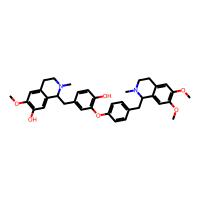
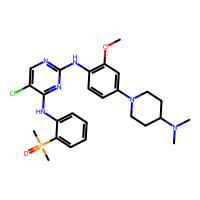
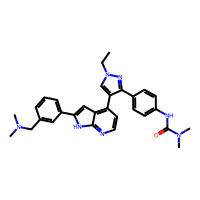
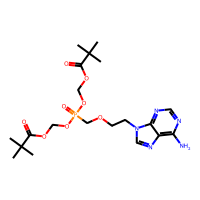
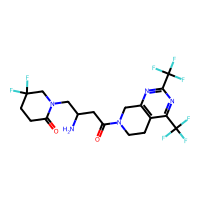
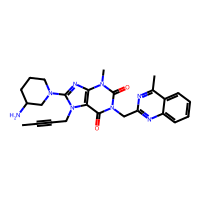
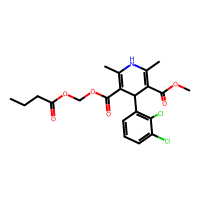
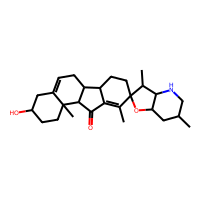
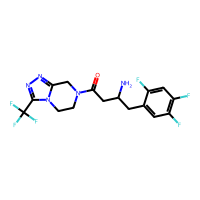
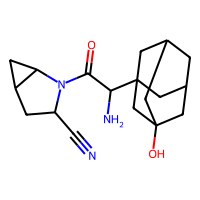
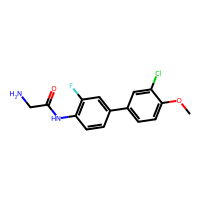
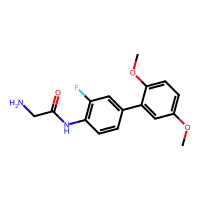
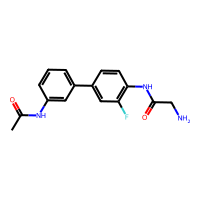
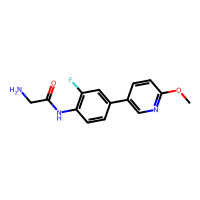
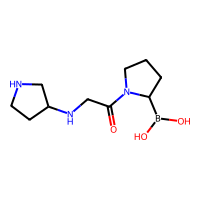

In [15]:
molecules

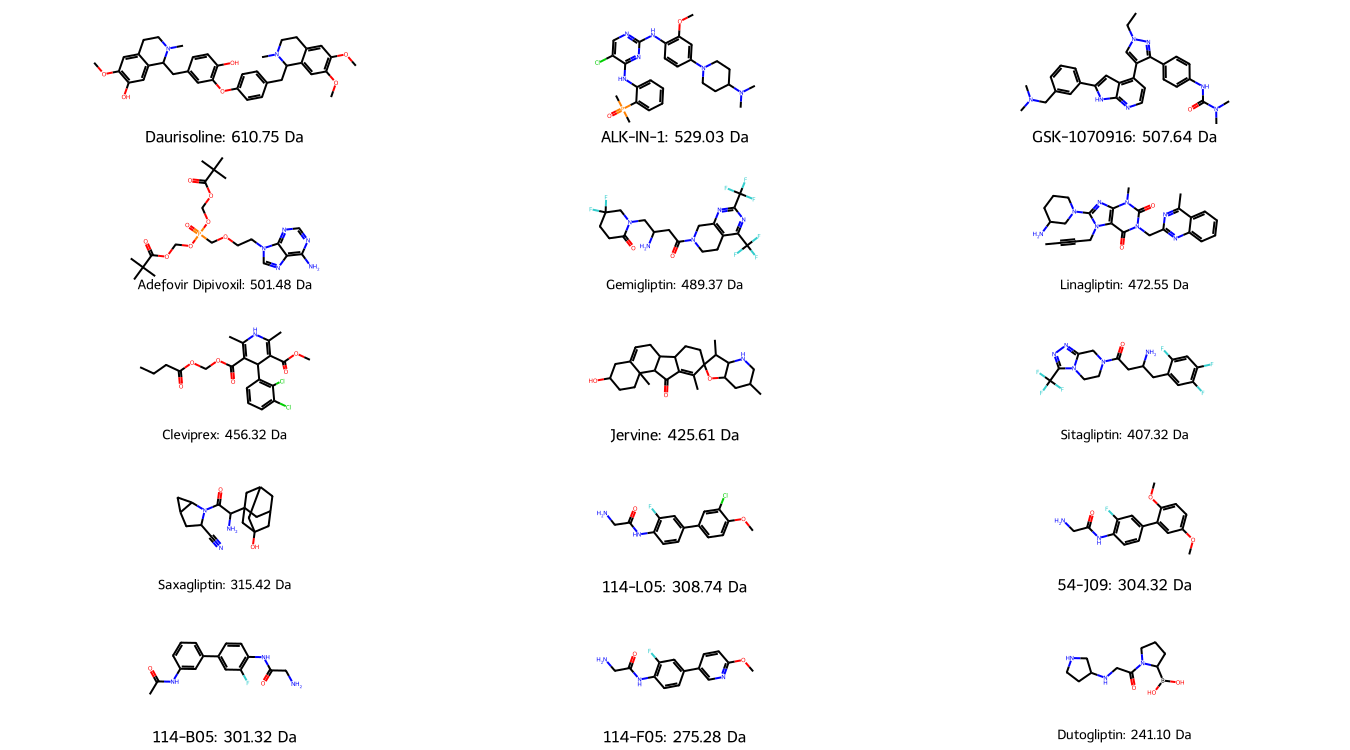

In [16]:
Draw.MolsToGridImage(
    molecules["ROMol"],
    legends=[
        f"{molecule['name']}: {molecule['molecule_weight']:.2f} Da"
        for index, molecule in molecules.iterrows()
    ],
    subImgSize=(450, 150),
    molsPerRow=3,
)

In [17]:
# 2D molecular descriptors: MACCS fingerprint
molecules["maccs"] = molecules.ROMol.apply(MACCSkeys.GenMACCSKeys)

In [18]:
fpg = rdFingerprintGenerator.GetMorganGenerator(radius=2, fpSize=2048)

In [19]:
# 2D molecular descriptors: Morgan fingerprint¶
molecules["morgan"] = molecules["ROMol"].map(fpg.GetFingerprint)

In [20]:
# Define molecule query and list
molecule_query = molecules["maccs"][0]
molecule_list = molecules["maccs"].to_list()
# Calculate similarty values between query and list elements
molecules["tanimoto_maccs"] = DataStructs.BulkTanimotoSimilarity(molecule_query, molecule_list)
molecules["dice_maccs"] = DataStructs.BulkDiceSimilarity(molecule_query, molecule_list)

,id,smiles,name,ROMol,molecule_weight,maccs,morgan,tanimoto_maccs,dice_maccs
7,8,CN1CCC2=CC(=C(C=C2C1CC3=CC=C(C=C3)OC4=C(C=CC(=...,Daurisoline,,610.751,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.405797,0.577320
12,13,CN(C)C1CCN(CC1)C2=CC(=C(C=C2)NC3=NC=C(C(=N3)NC...,ALK-IN-1,,529.025,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.430380,0.601770
13,14,CCN1C=C(C(=N1)C2=CC=C(C=C2)NC(=O)N(C)C)C3=C4C=...,GSK-1070916,,507.642,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...",0.364865,0.534653
10,11,CC(C)(C)C(=O)OCOP(=O)(COCCN1C=NC2=C(N=CN=C21)N...,Adefovir Dipivoxil,,501.477,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...",0.310345,0.473684
8,9,C1CC(CN(C1=O)CC(CC(=O)N2CCC3=C(C2)N=C(N=C3C(F)...,Gemigliptin,,489.367,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.430556,0.601942
6,7,CC#CCN1C2=C(N=C1N3CCCC(C3)N)N(C(=O)N(C2=O)CC4=...,Linagliptin,,472.553,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.432099,0.603448
14,15,CCCC(=O)OCOC(=O)C1=C(NC(=C(C1C2=C(C(=CC=C2)Cl)...,Cleviprex,,456.322,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.376812,0.547368
11,12,CC1CC2C(C(C3(O2)CCC4C5CC=C6CC(CCC6(C5C(=O)C4=C...,Jervine,,425.613,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.324324,0.489796
4,5,C1CN2C(=NN=C2C(F)(F)F)CN1C(=O)CC(CC3=CC(=C(C=C...,Sitagliptin,,407.318,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.386667,0.557692
5,6,C1C2CC2N(C1C#N)C(=O)C(C34CC5CC(C3)CC(C5)(C4)O)N,Saxagliptin,,315.417,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.388060,0.559140

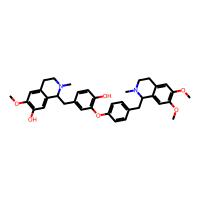
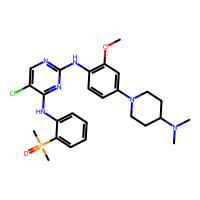
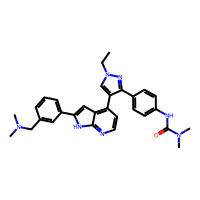
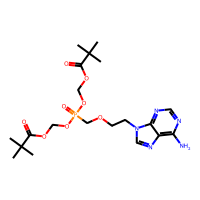
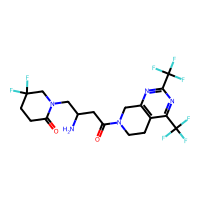
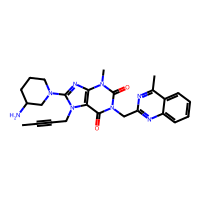
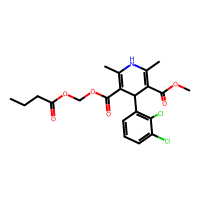
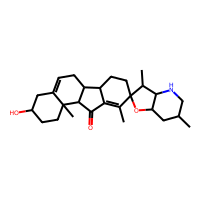
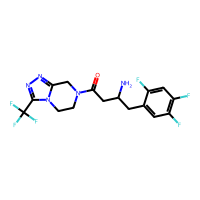
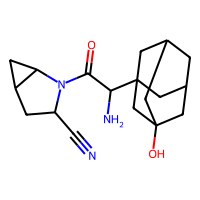
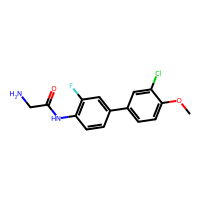
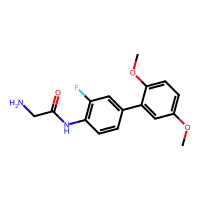
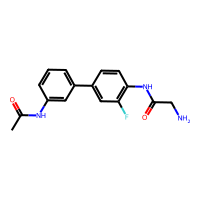
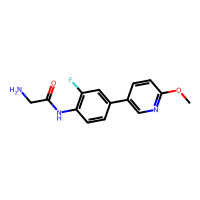
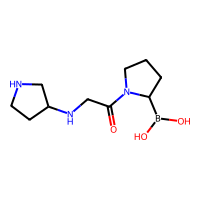

In [21]:
molecules

In [22]:
def draw_ranked_molecules(molecules, sort_by_column):
    """
    Draw molecules sorted by a given column.

    Parameters
    ----------
    molecules : pandas.DataFrame
        Molecules (with "ROMol" and "name" columns and a column to sort by.
    sort_by_column : str
        Name of the column used to sort the molecules by.

    Returns
    -------
    Draw.MolsToGridImage
        2D visualization of sorted molecules.
    """

    molecules_sorted = molecules.sort_values([sort_by_column], ascending=False).reset_index()
    return Draw.MolsToGridImage(
        molecules_sorted["ROMol"],
        legends=[
            f"#{index+1} {molecule['name']}, similarity={molecule[sort_by_column]:.2f}"
            for index, molecule in molecules_sorted.iterrows()
        ],
        molsPerRow=3,
        subImgSize=(450, 150),
    )

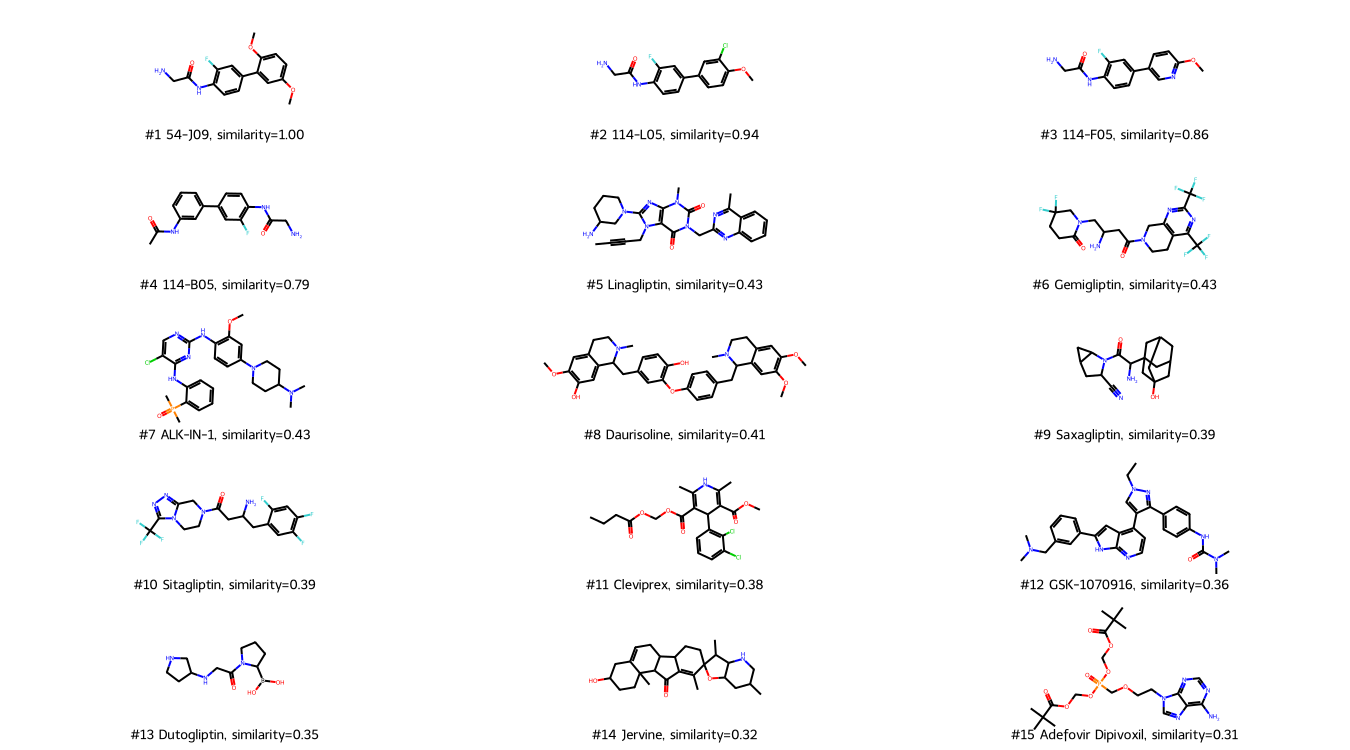

In [23]:
draw_ranked_molecules(molecules, "tanimoto_maccs")

In [24]:
# Morgan fingerprints: Tanimoto similarity and Dice similarity
# Define molecule query and list
molecule_query = molecules["morgan"][0]
molecule_list = molecules["morgan"].to_list()
# Calculate similarty values between query and list elements
molecules["tanimoto_morgan"] = DataStructs.BulkTanimotoSimilarity(molecule_query, molecule_list)
molecules["dice_morgan"] = DataStructs.BulkDiceSimilarity(molecule_query, molecule_list)

In [25]:
preview = molecules.sort_values(["tanimoto_morgan"], ascending=False).reset_index()

In [26]:
preview

,index,id,smiles,name,ROMol,molecule_weight,maccs,morgan,tanimoto_maccs,dice_maccs,tanimoto_morgan,dice_morgan
0,0,1,NCC(NC1=C(F)C=C(C2=CC(OC)=CC=C2OC)C=C1)=O,54-J09,<rdkit.Chem.rdchem.Mol object at 0x7e4ee097dd20>,304.321,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.000000,1.000000,1.000000,1.000000
1,2,3,NCC(NC1=C(F)C=C(C2=CC=C(OC)C(Cl)=C2)C=C1)=O,114-L05,<rdkit.Chem.rdchem.Mol object at 0x7e4ee097de00>,308.740,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.937500,0.967742,0.680000,0.809524
2,1,2,NCC(NC1=C(F)C=C(C2=CN=C(OC)C=C2)C=C1)=O,114-F05,<rdkit.Chem.rdchem.Mol object at 0x7e4ee097dd90>,275.283,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.862745,0.926316,0.574074,0.729412
3,3,4,NCC(NC1=C(F)C=C(C2=CC=CC(NC(C)=O)=C2)C=C1)=O,114-B05,<rdkit.Chem.rdchem.Mol object at 0x7e4ee097de70>,301.321,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.791667,0.883721,0.509091,0.674699
4,7,8,CN1CCC2=CC(=C(C=C2C1CC3=CC=C(C=C3)OC4=C(C=CC(=...,Daurisoline,<rdkit.Chem.rdchem.Mol object at 0x7e4ee097e030>,610.751,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.405797,0.577320,0.177215,0.301075
5,12,13,CN(C)C1CCN(CC1)C2=CC(=C(C=C2)NC3=NC=C(C(=N3)NC...,ALK-IN-1,<rdkit.Chem.rdchem.Mol object at 0x7e4ee097e260>,529.025,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.430380,0.601770,0.152174,0.264151
6,14,15,CCCC(=O)OCOC(=O)C1=C(NC(=C(C1C2=C(C(=CC=C2)Cl)...,Cleviprex,<rdkit.Chem.rdchem.Mol object at 0x7e4ee097e340>,456.322,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.376812,0.547368,0.151899,0.263736
7,13,14,CCN1C=C(C(=N1)C2=CC=C(C=C2)NC(=O)N(C)C)C3=C4C=...,GSK-1070916,<rdkit.Chem.rdchem.Mol object at 0x7e4ee097e2d0>,507.642,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...",0.364865,0.534653,0.147368,0.256881
8,4,5,C1CN2C(=NN=C2C(F)(F)F)CN1C(=O)CC(CC3=CC(=C(C=C...,Sitagliptin,<rdkit.Chem.rdchem.Mol object at 0x7e4ee097dee0>,407.318,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.386667,0.557692,0.134146,0.236559
9,10,11,CC(C)(C)C(=O)OCOP(=O)(COCCN1C=NC2=C(N=CN=C21)N...,Adefovir Dipivoxil,<rdkit.Chem.rdchem.Mol object at 0x7e4ee097e180>,501.477,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...",0.310345,0.473684,0.104651,0.189474


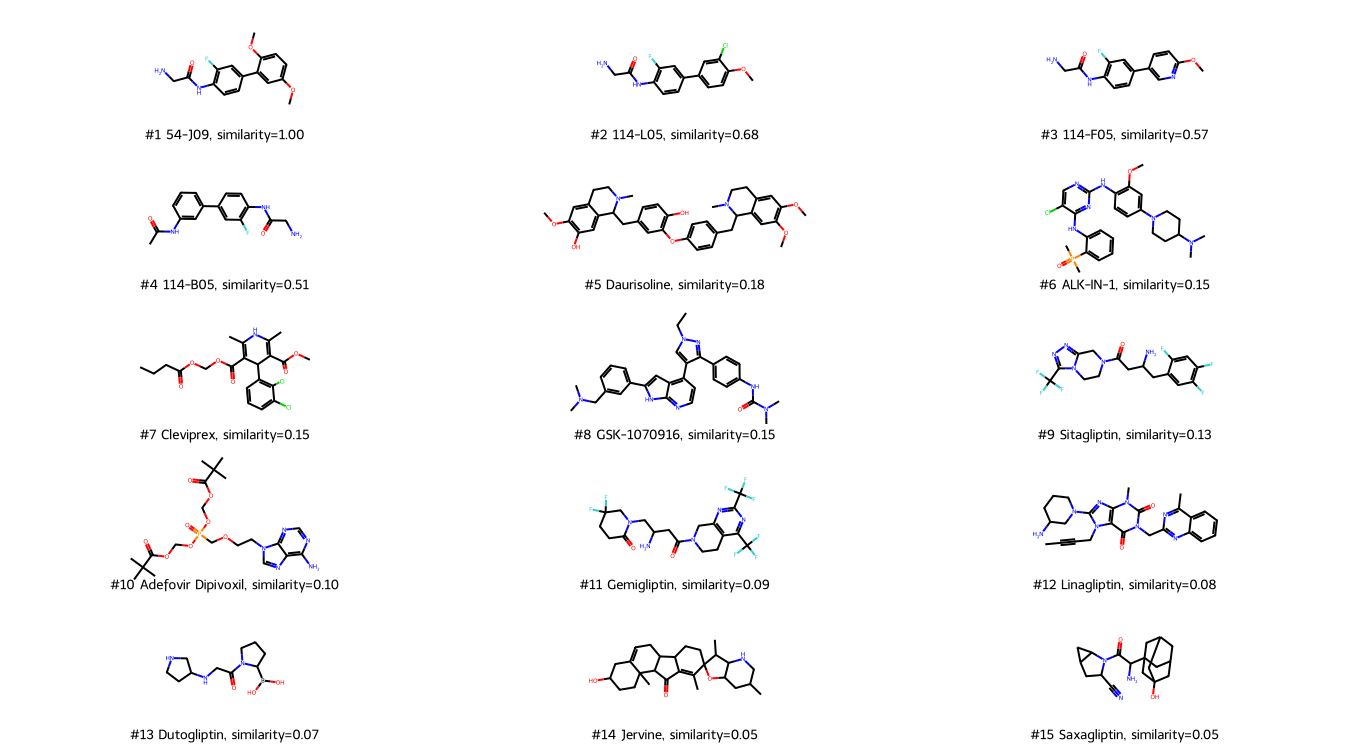

In [27]:
draw_ranked_molecules(molecules, "tanimoto_morgan")

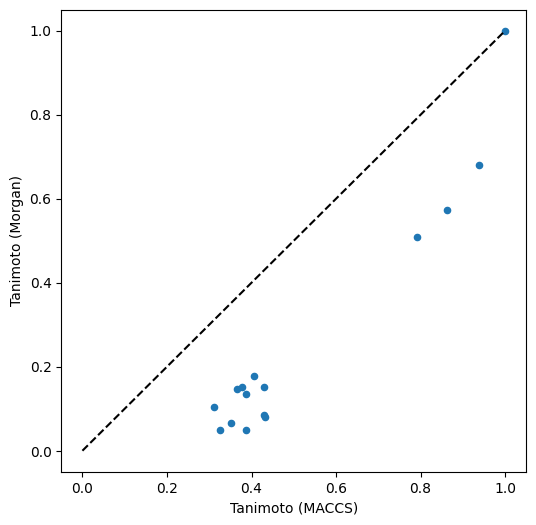

In [28]:
fig, ax = plt.subplots(figsize=(6, 6))
molecules.plot("tanimoto_maccs", "tanimoto_morgan", kind="scatter", ax=ax)
ax.plot([0, 1], [0, 1], "k--")
ax.set_xlabel("Tanimoto (MACCS)")
ax.set_ylabel("Tanimoto (Morgan)")
fig;

# T002

In [29]:
molecules["molecular_weight"] = molecules["ROMol"].apply(Descriptors.ExactMolWt)
molecules["n_hba"] = molecules["ROMol"].apply(Descriptors.NumHAcceptors)
molecules["n_hbd"] = molecules["ROMol"].apply(Descriptors.NumHDonors)
molecules["logp"] = molecules["ROMol"].apply(Descriptors.MolLogP)

,id,smiles,name,ROMol,molecule_weight,maccs,morgan,tanimoto_maccs,dice_maccs,tanimoto_morgan,dice_morgan,molecular_weight,n_hba,n_hbd,logp
7,8,CN1CCC2=CC(=C(C=C2C1CC3=CC=C(C=C3)OC4=C(C=CC(=...,Daurisoline,,610.751,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.405797,0.577320,0.177215,0.301075,610.304287,8,2,6.45930
12,13,CN(C)C1CCN(CC1)C2=CC(=C(C=C2)NC3=NC=C(C(=N3)NC...,ALK-IN-1,,529.025,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.430380,0.601770,0.152174,0.264151,528.216939,8,2,5.40420
13,14,CCN1C=C(C(=N1)C2=CC=C(C=C2)NC(=O)N(C)C)C3=C4C=...,GSK-1070916,,507.642,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...",0.364865,0.534653,0.147368,0.256881,507.274659,5,2,5.93540
10,11,CC(C)(C)C(=O)OCOP(=O)(COCCN1C=NC2=C(N=CN=C21)N...,Adefovir Dipivoxil,,501.477,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...",0.310345,0.473684,0.104651,0.189474,501.198850,13,1,2.70250
8,9,C1CC(CN(C1=O)CC(CC(=O)N2CCC3=C(C2)N=C(N=C3C(F)...,Gemigliptin,,489.367,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.430556,0.601942,0.086022,0.158416,489.141101,5,1,2.37400
6,7,CC#CCN1C2=C(N=C1N3CCCC(C3)N)N(C(=O)N(C2=O)CC4=...,Linagliptin,,472.553,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.432099,0.603448,0.079208,0.146789,472.233522,10,1,1.14742
14,15,CCCC(=O)OCOC(=O)C1=C(NC(=C(C1C2=C(C(=CC=C2)Cl)...,Cleviprex,,456.322,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.376812,0.547368,0.151899,0.263736,455.090243,7,1,4.24520
11,12,CC1CC2C(C(C3(O2)CCC4C5CC=C6CC(CCC6(C5C(=O)C4=C...,Jervine,,425.613,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.324324,0.489796,0.050000,0.095238,425.292994,4,2,4.18090
4,5,C1CN2C(=NN=C2C(F)(F)F)CN1C(=O)CC(CC3=CC(=C(C=C...,Sitagliptin,,407.318,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.386667,0.557692,0.134146,0.236559,407.118079,5,1,2.01650
5,6,C1C2CC2N(C1C#N)C(=O)C(C34CC5CC(C3)CC(C5)(C4)O)N,Saxagliptin,,315.417,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.388060,0.559140,0.048780,0.093023,315.194677,4,2,1.15798

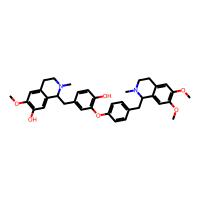
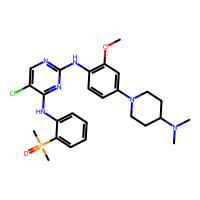
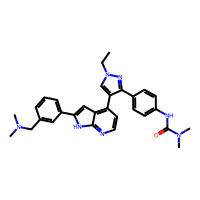
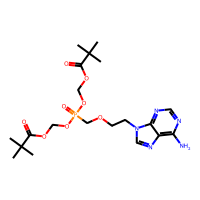
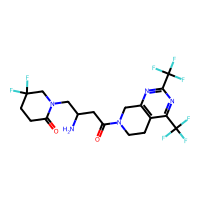
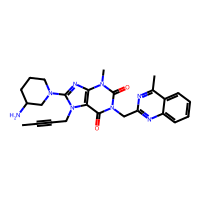
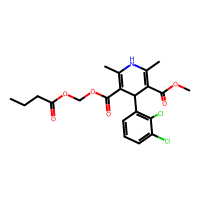
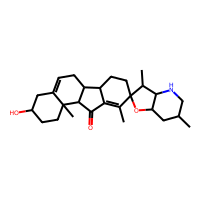
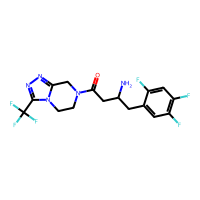
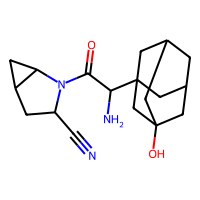
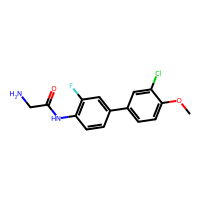
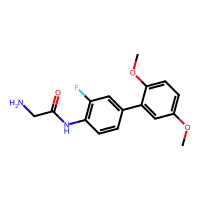
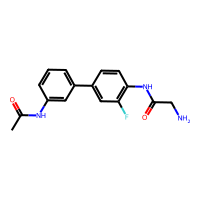
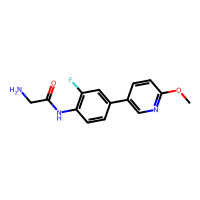
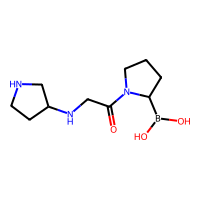

In [30]:
molecules

In [31]:
ro5_properties = {
    "molecular_weight": (500, "molecular weight (Da)"),
    "n_hba": (10, "# HBA"),
    "n_hbd": (5, "# HBD"),
    "logp": (5, "logP"),
}

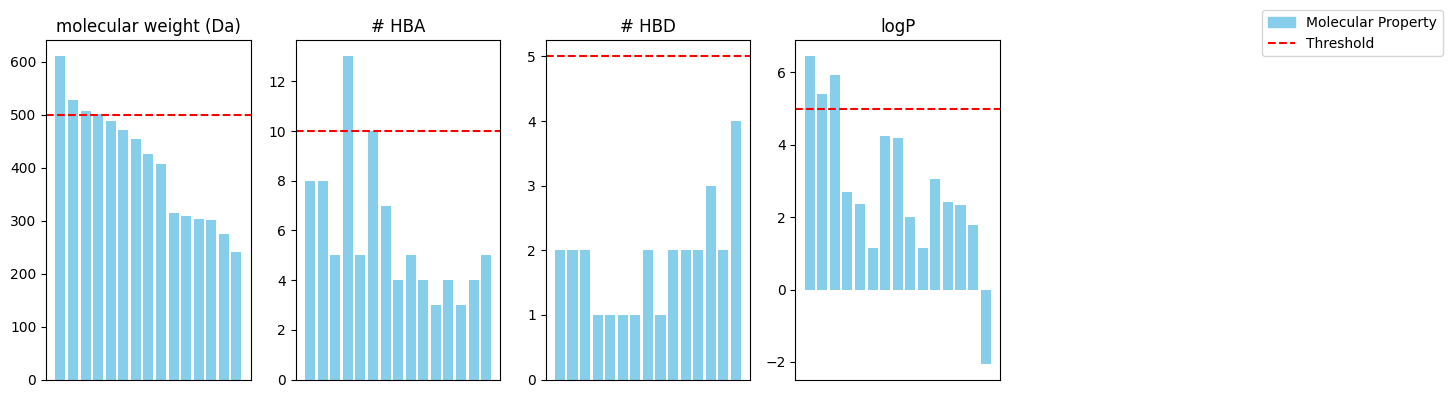

In [32]:
# Start 1x4 plot frame
fig, axes = plt.subplots(figsize=(12, 4), nrows=1, ncols=4)

# Create subplots
for index, (key, (threshold, title)) in enumerate(ro5_properties.items()):
    # Using the index of DataFrame as x-values
    x = np.arange(len(molecules))
    axes[index].bar(x, molecules[key], color='skyblue')
    axes[index].axhline(y=threshold, color="red", linestyle="dashed")
    axes[index].set_title(title)
    axes[index].set_xticks([])  # Optionally, you can add x-ticks as labels if needed

# Generate legend elements based on molecule CHEMBL IDs
legend_elements = [mpatches.Patch(color='skyblue', label='Molecular Property')]
legend_elements.append(Line2D([0], [0], color="red", ls="dashed", label="Threshold"))

# Add legend
fig.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(1.05, 1))

# Adjust layout to fit subplots and legend within the figure canvas
plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust the rect to make space for the legend
plt.show()

In [33]:
def calculate_ro5_properties(smiles):
    """
    Test if input molecule (SMILES) fulfills Lipinski's rule of five.

    Parameters
    ----------
    smiles : str
        SMILES for a molecule.

    Returns
    -------
    pandas.Series
        Molecular weight, number of hydrogen bond acceptors/donor and logP value
        and Lipinski's rule of five compliance for input molecule.
    """
    # RDKit molecule from SMILES
    molecule = Chem.MolFromSmiles(smiles)
    # Calculate Ro5-relevant chemical properties
    molecular_weight = Descriptors.ExactMolWt(molecule)
    n_hba = Descriptors.NumHAcceptors(molecule)
    n_hbd = Descriptors.NumHDonors(molecule)
    logp = Descriptors.MolLogP(molecule)
    # Check if Ro5 conditions fulfilled
    conditions = [molecular_weight <= 500, n_hba <= 10, n_hbd <= 5, logp <= 5]
    ro5_fulfilled = sum(conditions) >= 3
    # Return True if no more than one out of four conditions is violated
    return pd.Series(
        [molecular_weight, n_hba, n_hbd, logp, ro5_fulfilled],
        index=["molecular_weight", "n_hba", "n_hbd", "logp", "ro5_fulfilled"],
    )

In [34]:
for name, smiles in zip(molecules["name"], molecules["smiles"]):
    print(f"Ro5 fulfilled for {name}: {calculate_ro5_properties(smiles)['ro5_fulfilled']}")

Ro5 fulfilled for Daurisoline: False
Ro5 fulfilled for ALK-IN-1: False
Ro5 fulfilled for GSK-1070916: False
Ro5 fulfilled for Adefovir Dipivoxil: False
Ro5 fulfilled for Gemigliptin: True
Ro5 fulfilled for Linagliptin: True
Ro5 fulfilled for Cleviprex: True
Ro5 fulfilled for Jervine: True
Ro5 fulfilled for Sitagliptin: True
Ro5 fulfilled for Saxagliptin: True
Ro5 fulfilled for 114-L05: True
Ro5 fulfilled for 54-J09: True
Ro5 fulfilled for 114-B05: True
Ro5 fulfilled for 114-F05: True
Ro5 fulfilled for Dutogliptin: True


In [36]:
# This takes a couple of seconds
ro5_properties = molecules["smiles"].apply(calculate_ro5_properties)
ro5_properties.head()

,molecular_weight,n_hba,n_hbd,logp,ro5_fulfilled
7,610.304287,8,2,6.4593,False
12,528.216939,8,2,5.4042,False
13,507.274659,5,2,5.9354,False
10,501.198850,13,1,2.7025,False
8,489.141101,5,1,2.3740,True


In [38]:
molecules = pd.concat([molecules, ro5_properties], axis=1)
molecules.head()

,id,smiles,name,ROMol,molecule_weight,maccs,morgan,tanimoto_maccs,dice_maccs,tanimoto_morgan,dice_morgan,molecular_weight,n_hba,n_hbd,logp,molecular_weight,n_hba,n_hbd,logp,ro5_fulfilled
7,8,CN1CCC2=CC(=C(C=C2C1CC3=CC=C(C=C3)OC4=C(C=CC(=...,Daurisoline,<rdkit.Chem.rdchem.Mol object at 0x7e4ee097e030>,610.751,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.405797,0.577320,0.177215,0.301075,610.304287,8,2,6.4593,610.304287,8,2,6.4593,False
12,13,CN(C)C1CCN(CC1)C2=CC(=C(C=C2)NC3=NC=C(C(=N3)NC...,ALK-IN-1,<rdkit.Chem.rdchem.Mol object at 0x7e4ee097e260>,529.025,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.430380,0.601770,0.152174,0.264151,528.216939,8,2,5.4042,528.216939,8,2,5.4042,False
13,14,CCN1C=C(C(=N1)C2=CC=C(C=C2)NC(=O)N(C)C)C3=C4C=...,GSK-1070916,<rdkit.Chem.rdchem.Mol object at 0x7e4ee097e2d0>,507.642,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...",0.364865,0.534653,0.147368,0.256881,507.274659,5,2,5.9354,507.274659,5,2,5.9354,False
10,11,CC(C)(C)C(=O)OCOP(=O)(COCCN1C=NC2=C(N=CN=C21)N...,Adefovir Dipivoxil,<rdkit.Chem.rdchem.Mol object at 0x7e4ee097e180>,501.477,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...",0.310345,0.473684,0.104651,0.189474,501.198850,13,1,2.7025,501.198850,13,1,2.7025,False
8,9,C1CC(CN(C1=O)CC(CC(=O)N2CCC3=C(C2)N=C(N=C3C(F)...,Gemigliptin,<rdkit.Chem.rdchem.Mol object at 0x7e4ee097e0a0>,489.367,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.430556,0.601942,0.086022,0.158416,489.141101,5,1,2.3740,489.141101,5,1,2.3740,True


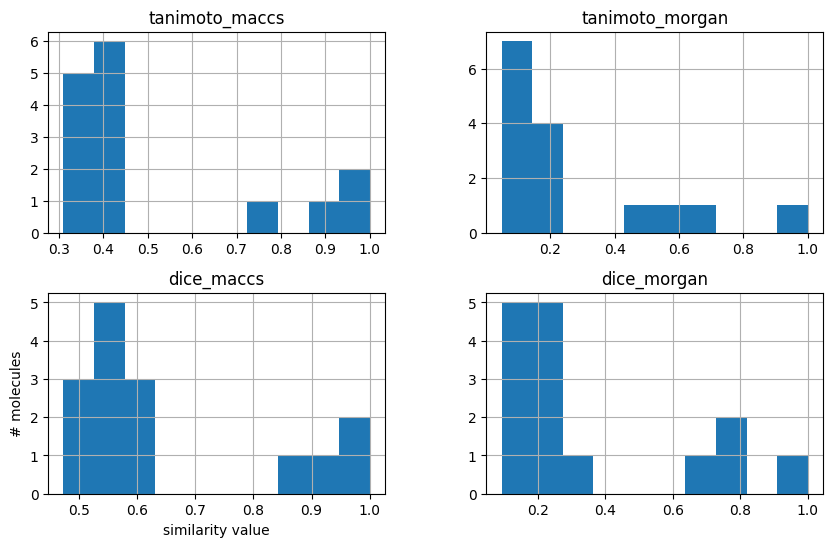

In [40]:
fig, axes = plt.subplots(figsize=(10, 6), nrows=2, ncols=2)
molecules.hist(["tanimoto_maccs"], ax=axes[0, 0])
molecules.hist(["tanimoto_morgan"], ax=axes[0, 1])
molecules.hist(["dice_maccs"], ax=axes[1, 0])
molecules.hist(["dice_morgan"], ax=axes[1, 1])
axes[1, 0].set_xlabel("similarity value")
axes[1, 0].set_ylabel("# molecules")
fig;

In [42]:
molecules.sort_values(["tanimoto_morgan"], ascending=False).head(3)

,id,smiles,name,ROMol,molecule_weight,maccs,morgan,tanimoto_maccs,dice_maccs,tanimoto_morgan,dice_morgan,molecular_weight,n_hba,n_hbd,logp,molecular_weight,n_hba,n_hbd,logp,ro5_fulfilled
0,1,NCC(NC1=C(F)C=C(C2=CC(OC)=CC=C2OC)C=C1)=O,54-J09,<rdkit.Chem.rdchem.Mol object at 0x7e4ee097dd20>,304.321,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.000000,1.000000,1.000000,1.000000,304.122321,4,2,2.4071,304.122321,4,2,2.4071,True
2,3,NCC(NC1=C(F)C=C(C2=CC=C(OC)C(Cl)=C2)C=C1)=O,114-L05,<rdkit.Chem.rdchem.Mol object at 0x7e4ee097de00>,308.740,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.937500,0.967742,0.680000,0.809524,308.072784,3,2,3.0519,308.072784,3,2,3.0519,True
1,2,NCC(NC1=C(F)C=C(C2=CN=C(OC)C=C2)C=C1)=O,114-F05,<rdkit.Chem.rdchem.Mol object at 0x7e4ee097dd90>,275.283,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.862745,0.926316,0.574074,0.729412,275.107005,4,2,1.7935,275.107005,4,2,1.7935,True
